In [16]:
library(factoextra)
library(cluster)
library(NbClust)


# Estudio del aeropuerto

In [37]:
dfAeropuerto <- read.csv('./cluster_sitios/aeropuerto.csv', header = TRUE, sep = ',')


In [38]:
dfAeropuerto.scaled <- dfAeropuerto
dfAeropuerto.scaled[,-(1)]<- as.data.frame(scale(dfAeropuerto[,-(1)]))
(dfAeropuerto.scaled)

mac_usr,avg_monthly_conections,X.0.00.3.59....,X.4.00.7.59....,X.8.00.11.59....,X.12.00.15.59....,X.16.00.19.59....,X.20.00.23.59....,diversidad,cant_conexiones
00:14:D1:5C:98:CD,122.65030,0.29462860,-0.183320439,0.149942711,0.212915388,-0.28687616,0.00724795,-0.1529013,34.177339
D0:92:9E:0F:27:14,85.73321,0.55835270,-0.103474224,-0.090491304,0.102082850,-0.32561392,0.16270187,-0.1529013,71.972601
2C:D0:5A:72:6D:AA,78.48164,0.46686719,-0.065820931,0.004699089,0.137365290,-0.36362237,0.09172935,-0.1529013,102.043284
00:0C:E7:80:B9:97,74.85586,0.28696733,-0.067779082,-0.054230467,0.150687480,-0.28816198,0.16995862,-0.1529013,79.789139
24:E3:14:85:4D:79,68.26352,0.31992680,-0.243900207,0.146096471,0.115626349,-0.14080281,-0.03232279,-0.1135506,94.502623
3C:D0:F8:61:11:09,57.71578,0.40338943,0.230589969,-0.152610752,-0.141592480,-0.53736984,0.46796423,-0.1529013,16.061362
90:94:E4:0A:4B:E6,54.74923,0.57387256,-0.290029176,-0.101047316,0.172904744,-0.25204576,0.21051146,-0.1529013,93.307152
D8:EB:97:23:BE:30,53.43076,0.37552114,-0.071289425,0.058861881,0.130020165,-0.32790424,0.06038773,-0.1529013,85.030818
1C:B0:94:75:B9:A9,52.11229,0.42005234,0.023862367,-0.183204138,0.084991357,-0.20253364,0.07283219,-0.1529013,72.616316
D8:EB:97:23:BE:4B,38.59800,0.09549561,0.118821153,0.135327000,0.023264936,-0.34147113,0.07076780,-0.1529013,16.521158


In [39]:
set.seed(55)
kmodel <- kmeans(dfAeropuerto.scaled[,-(1)], centers=9, nstart = 5)
dfAeropuerto.scaled$cluster = kmodel$cluster
dfAeropuerto$cluster = kmodel$cluster
kmodel

K-means clustering with 9 clusters of sizes 175, 26777, 10, 18899, 35468, 8812, 22468, 17800, 3121

Cluster means:
  avg_monthly_conections X.0.00.3.59.... X.4.00.7.59.... X.8.00.11.59....
1           14.633911809       0.2173576     -0.15864542       0.03490265
2            0.047720660      -0.2639862     -0.37666917       1.88530107
3           62.857802674       0.3538504     -0.16622945       0.01064662
4           -0.004602399      -0.2206316     -0.47346383      -0.49476176
5           -0.055665449      -0.2688720     -0.48074048      -0.49358720
6           -0.006599429       3.5086981     -0.33832617      -0.47982447
7           -0.093179035      -0.2556313      2.09795819      -0.47500402
8           -0.012487141      -0.2708674     -0.46827520      -0.47636326
9           -0.010264014       0.1216180      0.09423139      -0.08074279
  X.12.00.15.59.... X.16.00.19.59.... X.20.00.23.59.... diversidad
1       0.199754619        -0.2255081        0.09224065  0.1269107
2      -0.3

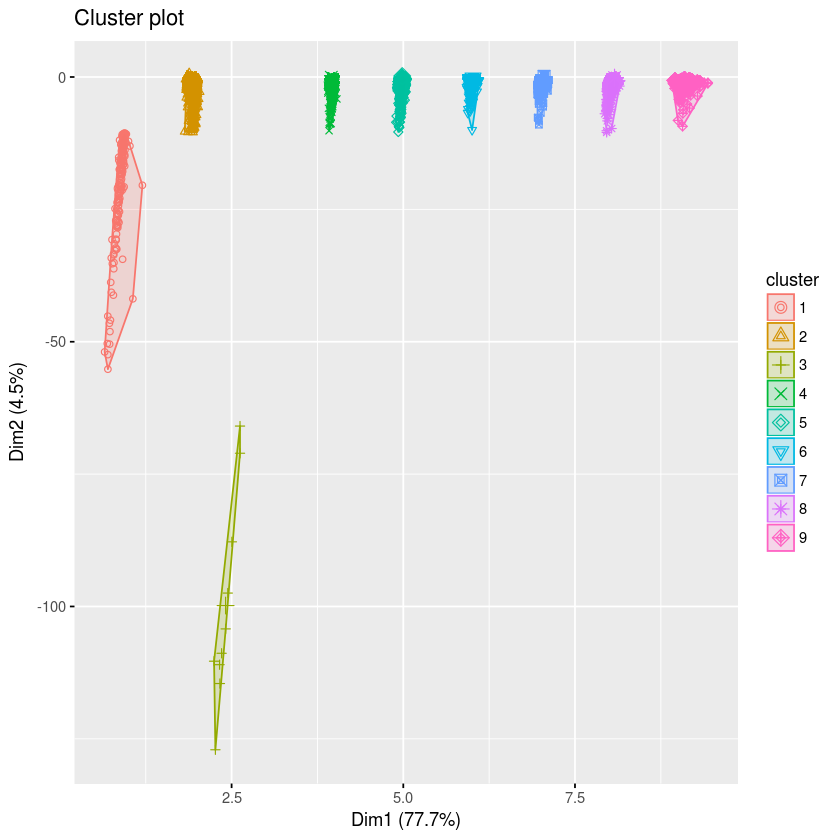

In [28]:
fviz_cluster(kmodel, data = dfAeropuerto.scaled[,-(1)], geom = "point",
             stand = FALSE)

In [40]:
kmodel$centers

,avg_monthly_conections,X.0.00.3.59....,X.4.00.7.59....,X.8.00.11.59....,X.12.00.15.59....,X.16.00.19.59....,X.20.00.23.59....,diversidad,cant_conexiones
1,14.633911809,0.2173576,-0.15864542,0.03490265,0.199754619,-0.2255081,0.09224065,0.1269107,15.239508679
2,0.047720660,-0.2639862,-0.37666917,1.88530107,-0.323131332,-0.6002901,-0.39920696,-0.1505858,-0.004830392
3,62.857802674,0.3538504,-0.16622945,0.01064662,0.068501948,-0.1517952,0.06693746,-0.1378820,78.979897464
4,-0.004602399,-0.2206316,-0.47346383,-0.49476176,-0.409591462,-0.5412741,2.32039113,-0.1493952,-0.030387179
5,-0.055665449,-0.2688720,-0.48074048,-0.49358720,-0.381012636,1.5791428,-0.40395743,-0.1495527,-0.043004798
6,-0.006599429,3.5086981,-0.33832617,-0.47982447,-0.391138938,-0.6299183,-0.26031894,-0.1441923,-0.029340562
7,-0.093179035,-0.2556313,2.09795819,-0.47500402,-0.414533699,-0.6467849,-0.42674098,-0.1488434,-0.055593808
8,-0.012487141,-0.2708674,-0.46827520,-0.47636326,2.395436491,-0.5150840,-0.40469432,-0.1494862,-0.029739161
9,-0.010264014,0.1216180,0.09423139,-0.08074279,-0.002191364,-0.1324091,0.07457520,6.2207152,0.259275768


In [87]:
write.csv(dfAeropuerto,"Airportclustering_inR.csv")

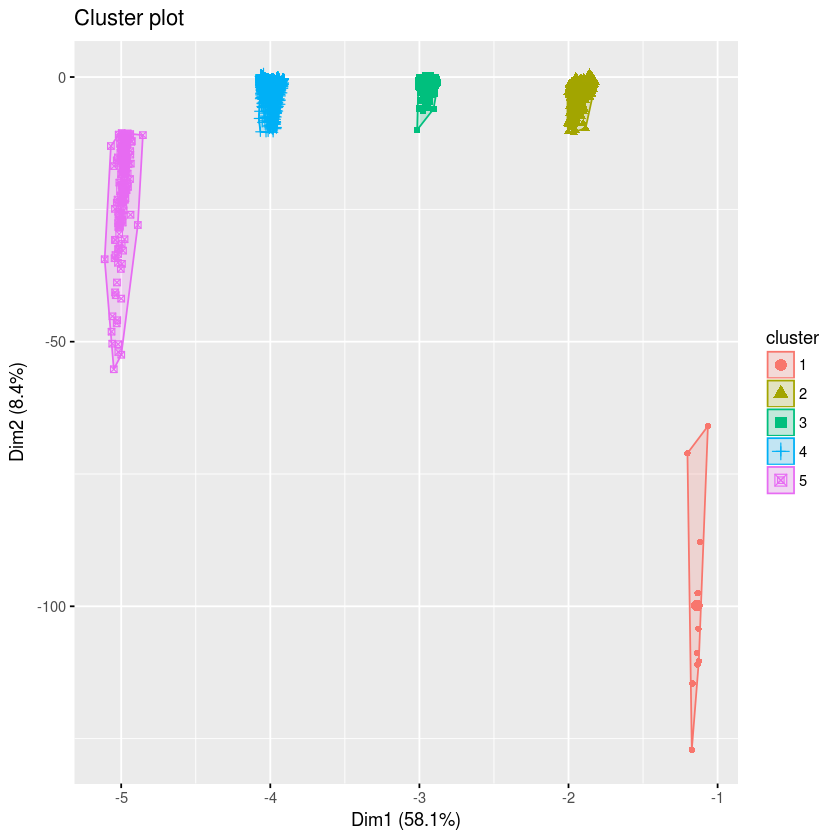

In [57]:
# set.seed(55)
# kmodel <- kmeans(dfAeropuerto.scaled[,-c(1)], centers=5)
# dfAeropuerto.scaled$cluster = kmodel$cluster
# fviz_cluster(kmodel, data = dfAeropuerto.scaled[,-c(1)], geom = "point",
#              stand = FALSE)

# Estudio Centro de convenciones

K-means clustering with 7 clusters of sizes 5307, 2513, 27, 7758, 3193, 6529, 9852

Cluster means:
  avg_monthly_conections X.0.00.3.59.... X.4.00.7.59.... X.8.00.11.59....
1            -0.20478575    -0.011083584      -0.1216310     -0.556729706
2             2.29198201     0.026087493       1.5948629     -0.006378999
3            11.52037340     0.169349341       0.3267214      0.334367902
4            -0.22166550    -0.011398228      -0.1269533     -0.466948021
5            -0.06213535     0.013734646      -0.1040275     -0.301122494
6            -0.22147906     0.002844883      -0.1220788      1.874932369
7            -0.16442215     0.001490942      -0.1275986     -0.476634138
  X.12.00.15.59.... X.16.00.19.59.... X.20.00.23.59.... diversidad
1       -0.71056426        -0.5526100         1.9907477 -0.3636587
2       -0.03919009        -0.1644730        -0.1982096 -0.2176280
3        0.10812602        -0.1743846        -0.3277602 -0.1157361
4        1.64523849        -0.6642708    

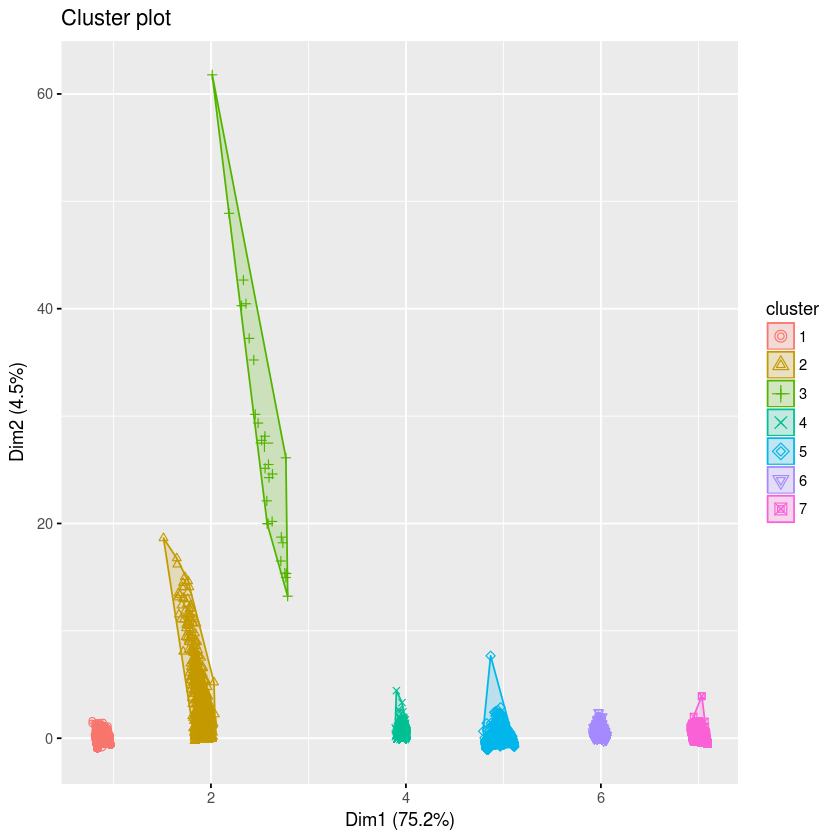

In [35]:
df <- read.csv('./cluster_sitios/centroConvenciones.csv', header = TRUE, sep = ',')
df.scaled <- df
df.scaled[,-(1)]<- as.data.frame(scale(df[,-(1)]))
set.seed(55)
kmodel <- kmeans(df.scaled[,-(1)], centers=7)
df.scaled$cluster = kmodel$cluster
fviz_cluster(kmodel, data = df.scaled[,-(1)], geom = "point", stand = FALSE)
kmodel

In [36]:
kmodel$centers

,avg_monthly_conections,X.0.00.3.59....,X.4.00.7.59....,X.8.00.11.59....,X.12.00.15.59....,X.16.00.19.59....,X.20.00.23.59....,diversidad,cant_conexiones
1,-0.20478575,-0.011083584,-0.1216310,-0.556729706,-0.71056426,-0.5526100,1.9907477,-0.3636587,-0.11006173
2,2.29198201,0.026087493,1.5948629,-0.006378999,-0.03919009,-0.1644730,-0.1982096,-0.2176280,0.85332676
3,11.52037340,0.169349341,0.3267214,0.334367902,0.10812602,-0.1743846,-0.3277602,-0.1157361,28.45547936
4,-0.22166550,-0.011398228,-0.1269533,-0.466948021,1.64523849,-0.6642708,-0.4930578,-0.1303966,-0.10232732
5,-0.06213535,0.013734646,-0.1040275,-0.301122494,-0.34477145,0.2959123,0.3328821,2.6222051,0.02289619
6,-0.22147906,0.002844883,-0.1220788,1.874932369,-0.43895337,-0.7100037,-0.4923166,-0.1975903,-0.10249042
7,-0.16442215,0.001490942,-0.1275986,-0.476634138,-0.50045154,1.2378105,-0.4142674,-0.3645002,-0.09528043


In [18]:
write.csv(df,"CentroConvencionesclustering_inR.csv")

# estudio city mall

K-means clustering with 10 clusters of sizes 7494, 103, 2220, 1410, 9024, 40, 2303, 4329, 1734, 4954

Cluster means:
   avg_monthly_conections X.0.00.3.59.... X.4.00.7.59.... X.8.00.11.59....
1             -0.18034055     -0.21741691     -0.04133970      -0.28641085
2             12.96002570     -0.03173229      0.21137465       0.23699012
3             -0.08930376     -0.19857139     -0.03763217       3.42837550
4             -0.08747157     -0.18360722     -0.04133970      -0.25669597
5             -0.20149887     -0.22206542     -0.04133970      -0.30744728
6              0.14624130      0.16182740     26.67260748      -0.12571680
7              0.02014635     -0.18558862     -0.03276230      -0.12718703
8              0.70439776     -0.24665425      0.01351110      -0.11553022
9             -0.03053362      3.97539929     -0.02435716      -0.02947614
10            -0.18008372     -0.21566710     -0.04133970      -0.30349470
   X.12.00.15.59.... X.16.00.19.59.... X.20.00.23.59....  

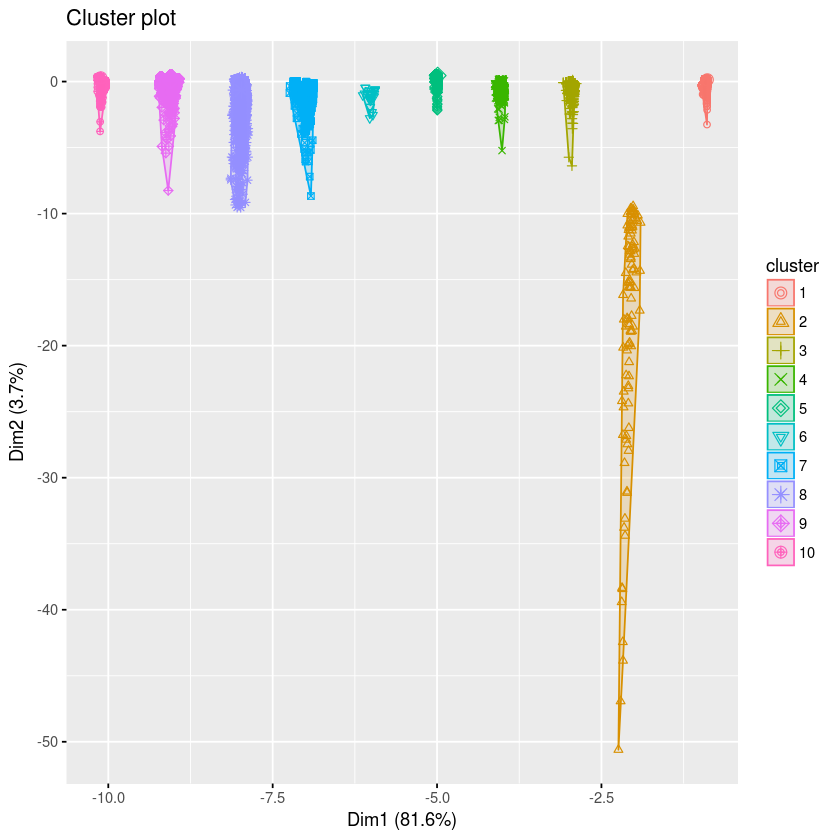

In [33]:
df <- read.csv('./cluster_sitios/cityMall.csv', header = TRUE, sep = ',')
df.scaled <- df
df.scaled[,-(1)]<- as.data.frame(scale(df[,-(1)]))
set.seed(55)
kmodel <- kmeans(df.scaled[,-(1)], centers=10)
df.scaled$cluster = kmodel$cluster
fviz_cluster(kmodel, data = df.scaled[,-(1)], geom = "point", stand = FALSE)
kmodel

In [34]:
kmodel$centers

,avg_monthly_conections,X.0.00.3.59....,X.4.00.7.59....,X.8.00.11.59....,X.12.00.15.59....,X.16.00.19.59....,X.20.00.23.59....,diversidad,cant_conexiones
1,-0.18034055,-0.21741691,-0.04133970,-0.28641085,1.53787689,-0.86834658,-0.539232033,-0.36128335,-0.14162486
2,12.96002570,-0.03173229,0.21137465,0.23699012,-0.04771501,-0.07203554,-0.055806644,0.09164333,13.36055433
3,-0.08930376,-0.19857139,-0.03763217,3.42837550,-0.56798430,-0.79669080,-0.513316261,-0.13516307,-0.08035061
4,-0.08747157,-0.18360722,-0.04133970,-0.25669597,-0.72188951,1.16965945,-0.391949817,2.54553345,0.12262919
5,-0.20149887,-0.22206542,-0.04133970,-0.30744728,-0.75360493,1.35589480,-0.545780814,-0.36410685,-0.15205759
6,0.14624130,0.16182740,26.67260748,-0.12571680,-0.59117487,-0.78335135,-0.510123916,-0.22834239,-0.01512418
7,0.02014635,-0.18558862,-0.03276230,-0.12718703,0.57952025,-0.68955533,0.230304806,2.61806330,0.19365963
8,0.70439776,-0.24665425,0.01351110,-0.11553022,-0.02342700,0.05563614,-0.019998229,-0.33940836,0.31687117
9,-0.03053362,3.97539929,-0.02435716,-0.02947614,0.02421339,-0.01191690,0.001317335,-0.07342755,-0.05455859
10,-0.18008372,-0.21566710,-0.04133970,-0.30349470,-0.74529132,-0.84823516,2.066691848,-0.34902415,-0.13316217


In [12]:
write.csv(df,"CityMallclustering_inR.csv")

# Estudio mall del sur

K-means clustering with 9 clusters of sizes 5690, 1562, 115, 7565, 1748, 1738, 3657, 9276, 3306

Cluster means:
  avg_monthly_conections X.0.00.3.59.... X.4.00.7.59.... X.8.00.11.59....
1           -0.183562290     -0.21963823     -0.03032550      -0.26119636
2            0.252826745     -0.25974557      0.62133560      -0.22947225
3           12.591632277      0.04501090      0.05401573       0.44689476
4           -0.196089270     -0.21531990     -0.03032550      -0.26344014
5           -0.022997107      3.95304130     -0.02190355      -0.16682101
6           -0.108025026     -0.04787839     -0.03032550       4.05895652
7            0.728028133     -0.24917485     -0.02795321      -0.02445143
8           -0.191378710     -0.21094184     -0.03032550      -0.25965737
9            0.007776206     -0.20556314     -0.03032550      -0.14479368
  X.12.00.15.59.... X.16.00.19.59.... X.20.00.23.59....  diversidad
1     -7.358241e-01       -0.86927647        1.94675365 -0.32711203
2     -7.280

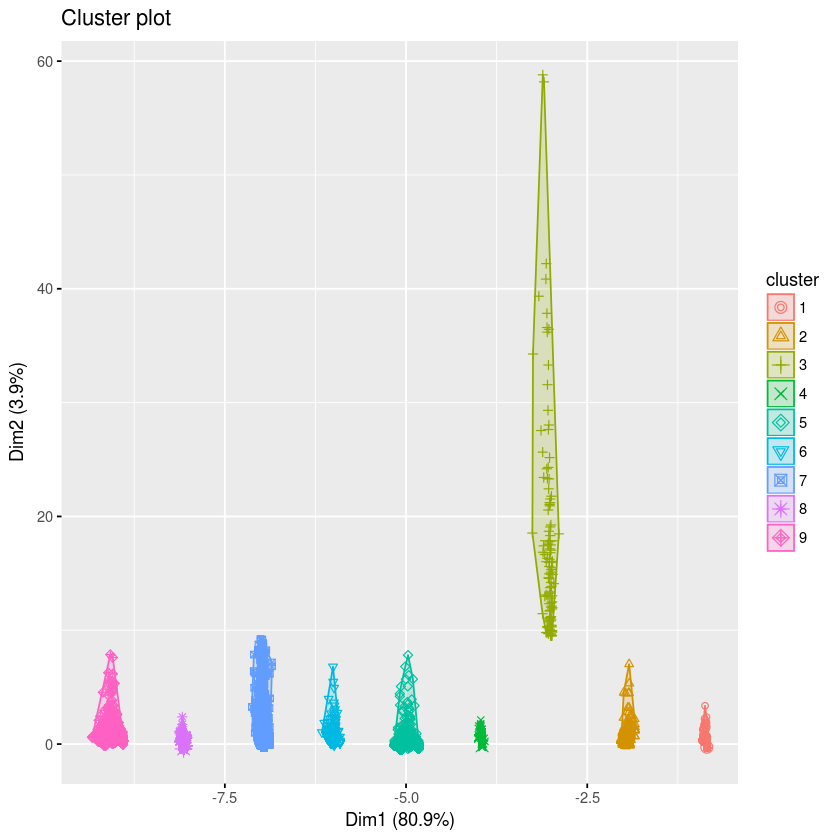

In [32]:
df <- read.csv('./cluster_sitios/mallSur.csv', header = TRUE, sep = ',')
df.scaled <- df
df.scaled[,-(1)]<- as.data.frame(scale(df[,-(1)]))
set.seed(55)
kmodel <- kmeans(df.scaled[,-(1)], centers=9)
df.scaled$cluster = kmodel$cluster
fviz_cluster(kmodel, data = df.scaled[,-(1)], geom = "point", stand = FALSE)
kmodel

In [31]:
kmodel$centers

,avg_monthly_conections,X.0.00.3.59....,X.4.00.7.59....,X.8.00.11.59....,X.12.00.15.59....,X.16.00.19.59....,X.20.00.23.59....,diversidad,cant_conexiones
1,-0.183562290,-0.21963823,-0.03032550,-0.26119636,-7.358241e-01,-0.86927647,1.94675365,-0.32711203,-0.13480503
2,0.252826745,-0.25974557,0.62133560,-0.22947225,-7.280782e-01,0.18261087,0.65048154,-0.32936703,0.02890053
3,12.591632277,0.04501090,0.05401573,0.44689476,-5.191451e-02,-0.14438247,-0.08735016,0.13029890,12.93396692
4,-0.196089270,-0.21531990,-0.03032550,-0.26344014,1.575712e+00,-0.87063135,-0.59310446,-0.32864652,-0.14260681
5,-0.022997107,3.95304130,-0.02190355,-0.16682101,7.796892e-05,0.04721719,0.02821929,-0.08087336,-0.03725937
6,-0.108025026,-0.04787839,-0.03032550,4.05895652,-5.643613e-01,-0.80062199,-0.56049909,-0.11850035,-0.08282489
7,0.728028133,-0.24917485,-0.02795321,-0.02445143,2.831056e-01,-0.06328428,-0.27072471,-0.30425605,0.35894384
8,-0.191378710,-0.21094184,-0.03032550,-0.25965737,-7.462710e-01,1.36838748,-0.59211648,-0.33007228,-0.14028993
9,0.007776206,-0.20556314,-0.03032550,-0.14479368,8.397495e-02,0.03360216,-0.05712857,2.83384766,0.15458654


In [14]:
write.csv(df,"MallSurclustering_inR.csv")